**a. Data Loading**

● Load the dataset using pandas.

● Display the first few rows using .head().


In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/student-por.csv', sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


**b. Data Exploration**

● Check for missing values using .isnull().sum().

● Display column data types using .dtypes.

● Understand the dataset's size using .shape.


In [4]:
data.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


In [5]:
data.dtypes

,0
school,object
sex,object
age,int64
address,object
famsize,object
Pstatus,object
Medu,int64
Fedu,int64
Mjob,object
Fjob,object


In [6]:
data.shape

(649, 33)

**c. Data Cleaning**

● Handle missing values (e.g., replace them with the median or remove rows).

● Remove duplicate entries using .drop_duplicates().

In [7]:
data.drop_duplicates(inplace=True)

**d. Data Analysis Questions**
1. What is the average score in math (G3)?
2. How many students scored above 15 in their final grade (G3)?
3. Is there a correlation between study time (study time) and the final grade (G3)?
4. Which gender has a higher average final grade (G3)?

In [8]:
# 1.
avg_G3 = data.G3.mean()
print("The average final score (G3) is:", avg_G3)

The average final score (G3) is: 11.906009244992296


In [9]:
# 2.
students_above_15 = data[data.G3 > 15].shape[0]
print("Number of students who scored above 15 in G3:", students_above_15)

Number of students who scored above 15 in G3: 82


In [10]:
# 3.
correlation_studytime_G3 = data.studytime.corr(data.G3)
print("The correlation between study time and G3 is:", correlation_studytime_G3)

The correlation between study time and G3 is: 0.24978868999886314


In [11]:
# 4.
avg_G3_by_gender = data.groupby('sex').G3.mean()
print("Average G3 by gender:", avg_G3_by_gender)

Average G3 by gender: sex
F    12.253264
M    11.406015
Name: G3, dtype: float64


**e. Data Visualization**
1. Plot a histogram of final grades (G3).
2. Create a scatter plot between study time (study time) and final grade (G3).
3. Create a bar chart comparing the average scores of male and female students.

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

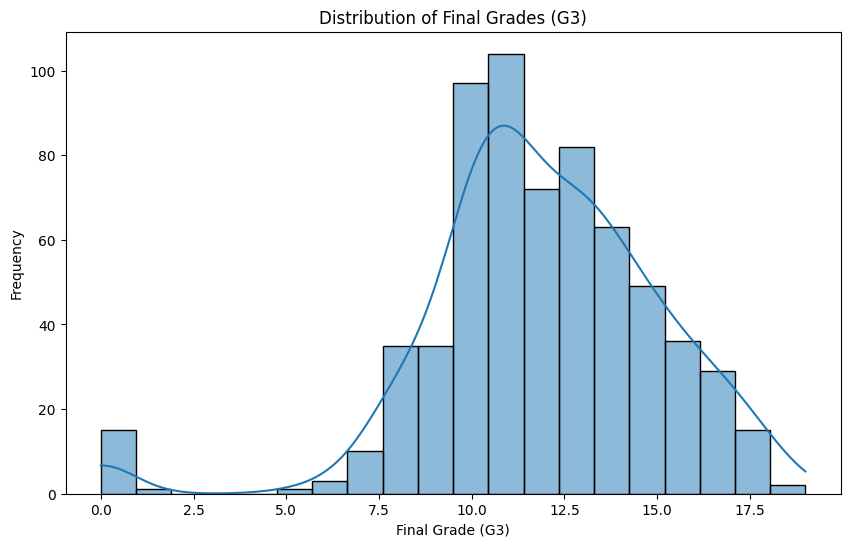

In [13]:
# 1.
plt.figure(figsize=(10,6))
sns.histplot(data.G3, bins=20, kde=True)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Frequency')
plt.show()

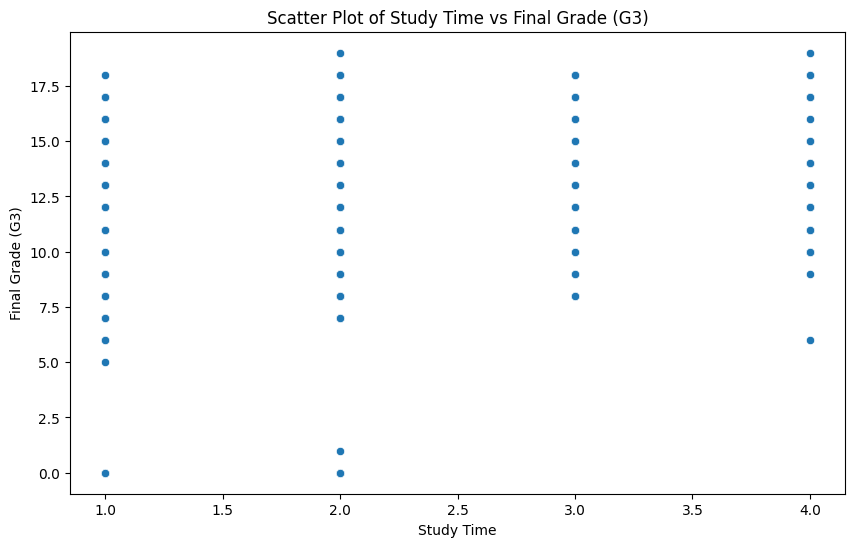

In [14]:
# 2.
plt.figure(figsize=(10,6))
sns.scatterplot(x='studytime', y='G3', data=data)
plt.title('Scatter Plot of Study Time vs Final Grade (G3)')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')
plt.show()

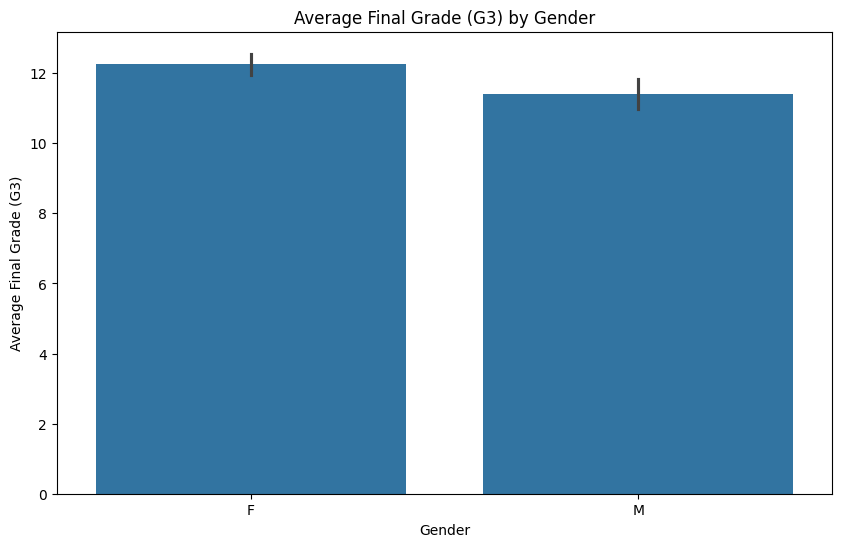

In [15]:
# 3.
plt.figure(figsize=(10,6))
sns.barplot(x='sex', y='G3', data=data)
plt.title('Average Final Grade (G3) by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.show()